In [1]:
import torch
import torchvision
import torchmetrics
from torchvision import transforms
from torch import nn
from torch.utils.data import DataLoader

import wandb
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm  

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = torchvision.datasets.EMNIST(
    root = "data",
    split = "balanced",
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

test_data = torchvision.datasets.EMNIST(
    root = "data",
    split = "balanced",
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

In [3]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: stefansu3526. Use `wandb login --relogin` to force relogin


True

In [9]:
config = dict(
    epochs = 5,
    classes = 47,
    kernels = [32, 64],
    batch_size = 32,
    learning_rate = 0.001,
    dataset="EMNIST",
    architecture="ON"
)

In [10]:
class eMNISTModel(nn.Module):

    def __init__(self, input_features: int, kernels: list[int], output_features: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features, out_channels=kernels[0],
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=kernels[0], out_channels=kernels[0],
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=kernels[0], out_channels=kernels[1],
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=kernels[1], out_channels=kernels[1],
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=kernels[-1]*49, out_features=output_features)
        )

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.classifier(self.conv_block2(self.conv_block1(x)))

In [11]:
def make(config, device):
    train_dataloader = DataLoader(
        train_data, batch_size=config.batch_size, shuffle=True
    )

    test_dataloader = DataLoader(
        test_data, batch_size=config.batch_size, shuffle=False
    )

    model = eMNISTModel(1, config.kernels, config.classes).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimiser = torch.optim.Adam(
        params=model.parameters(), lr=config.learning_rate
    )
    return model, train_dataloader, test_dataloader, loss_fn, optimiser

In [12]:
from utils import *
device = "cpu" if torch.cuda.is_available() else "cpu"
def model_pipeline(config):
    with wandb.init(project="EMNIST", config=config):
        config = wandb.config
        model, train_dataloader, test_dataloader, loss_fn, optimiser = make(config, device)

        train(model, train_dataloader, loss_fn, optimiser, config, device)
        test(model, test_dataloader, device)
    return model

In [13]:
model = model_pipeline(config)

  0%|          | 0/5 [00:00<?, ?it/s]

y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torc

 20%|██        | 1/5 [01:26<05:44, 86.05s/it]

y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torc

 40%|████      | 2/5 [02:51<04:17, 85.86s/it]

y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torc

 60%|██████    | 3/5 [04:16<02:50, 85.36s/it]

y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torc

 80%|████████  | 4/5 [05:41<01:25, 85.09s/it]

y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64
y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torc

100%|██████████| 5/5 [07:05<00:00, 85.04s/it]

y_pred: torch.Size([32]), torch.int64, y: torch.Size([32]), torch.int64


accuracy,▅▄▁▆▅▃▅▅▆▅▇▇▇▆▅▅▆▆▇▄█▅▆▇▆▆▅▆▆▄▄▆█▇█
epoch,▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆███████
loss,▅▅█▄▂▃▃▂▃▃▂▃▁▂▄▄▂▂▁▄▁▂▂▂▄▄▃▂▂▄▂▂▁▂▁
test_accuracy,▁
accuracy,0.96875
epoch,4
loss,0.17509
test_accuracy,0.87989


Text(0.5, 1.0, 'g')

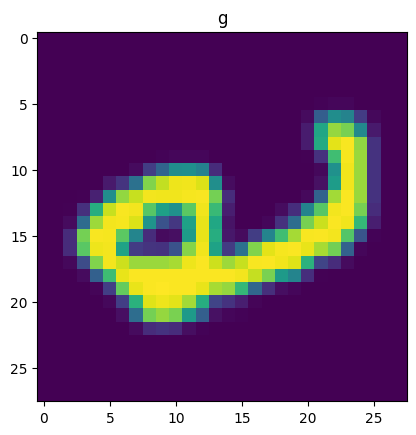

In [20]:
class_names = test_data.classes
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)
batch_data, batch_label = next(iter(test_dataloader))
img, label = batch_data[0], batch_label[0]
plt.imshow(img.squeeze())
plt.title(class_names[label])
